<a href="https://colab.research.google.com/github/manasa-27/Bike-Sharing-Demand-Prediction/blob/main/Copy_of_Bike_Sharing_Demand_Prediction_Capstone_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

## **1. Importing Libraries, Loading And Examining The DataSet.**

In [1]:
# Importing Required Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import  mean_squared_error,r2_score,mean_absolute_error
from  sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Mounting Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Importing  Dataset (CSV file) & Creating A DataFrame

df=pd.read_csv('/SeoulBikeData.csv', encoding = 'latin',parse_dates=['Date'])

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# Checking The Shape Of The DataFrame

df.shape

(8760, 14)

In [9]:
# Checking All The Columns

df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [10]:
# Renaming Column Names

df.rename(columns={'Date' : 'date', 'Rented Bike Count' : 'bike_count', 'Hour' : 'hour', 'Temperature(°C)' : 'temp', 'Humidity(%)' : 'humid',
                    'Wind speed (m/s)' : 'wind', 'Visibility (10m)' : 'visibility', 'Dew point temperature(°C)' : 'dew_temp',
                    'Solar Radiation (MJ/m2)' : 'sunlight', 'Rainfall(mm)' : 'rain', 'Snowfall (cm)' : 'snow', 'Seasons' : 'season', 
                    'Holiday' : 'holiday', 'Functioning Day' : 'func_day'}, inplace=True)

In [11]:
# Checking The First 5 Rows Of DataSet

df.head()

,date,bike_count,hour,temp,humid,wind,visibility,dew_temp,sunlight,rain,snow,season,holiday,func_day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [12]:
# Checking The Last 5 Rows Of DataSet

df.tail()

,date,bike_count,hour,temp,humid,wind,visibility,dew_temp,sunlight,rain,snow,season,holiday,func_day
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,2018-11-30,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [13]:
# Getting The Information Of DataSet

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        8760 non-null   datetime64[ns]
 1   bike_count  8760 non-null   int64         
 2   hour        8760 non-null   int64         
 3   temp        8760 non-null   float64       
 4   humid       8760 non-null   int64         
 5   wind        8760 non-null   float64       
 6   visibility  8760 non-null   int64         
 7   dew_temp    8760 non-null   float64       
 8   sunlight    8760 non-null   float64       
 9   rain        8760 non-null   float64       
 10  snow        8760 non-null   float64       
 11  season      8760 non-null   object        
 12  holiday     8760 non-null   object        
 13  func_day    8760 non-null   object        
dtypes: datetime64[ns](1), float64(6), int64(4), object(3)
memory usage: 958.2+ KB


In [14]:
# Getting The Statistical Summary Of DataSet

df.describe()

,bike_count,hour,temp,humid,wind,visibility,dew_temp,sunlight,rain,snow
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [15]:
# Checking For Missing Data/Values

df.isnull().sum()

date          0
bike_count    0
hour          0
temp          0
humid         0
wind          0
visibility    0
dew_temp      0
sunlight      0
rain          0
snow          0
season        0
holiday       0
func_day      0
dtype: int64

In [16]:
# Checking For Duplicate Values In DataSet

print(len(df[df.duplicated()]))

0


## **2. Exploratory Data Analysis(Data Visualization,Data Cleaning)**

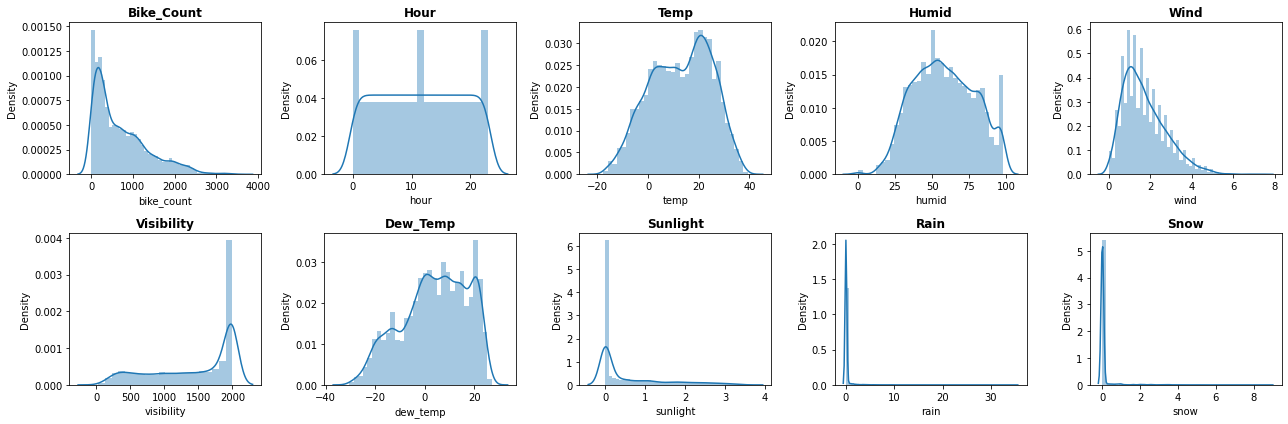

In [17]:
# Visualizaion Of Data Distribution In Each Column/Feature

plt.figure(figsize=(18,6), frameon=True, facecolor='none')
for n,column in enumerate(df.describe().columns):
  plt.subplot(2, 5, n+1)
  sns.distplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

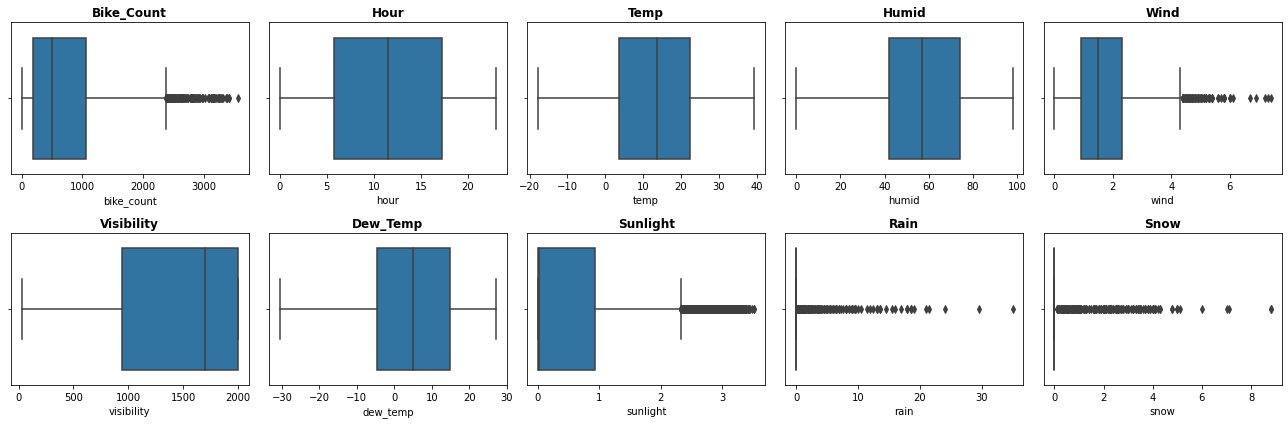

In [18]:
# Checking For Outliers

plt.figure(figsize=(18,6), frameon=True, facecolor='none')
for n,column in enumerate(df.describe().columns):
  plt.subplot(2, 5, n+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

In [19]:
# 'Bike_Count' Column Summary
df.bike_count.describe()

count    8760.000000
mean      704.602055
std       644.997468
min         0.000000
25%       191.000000
50%       504.500000
75%      1065.250000
max      3556.000000
Name: bike_count, dtype: float64

In [20]:
# Removing Outliers By Using IQR Method:

q1, q3, median = df.bike_count.quantile([0.25,0.75,0.5])
lower_limit = q1 - 1.5*(q3-q1)
upper_limit = q3 + 1.5*(q3-q1)
df['bike_count'] = np.where(df['bike_count'] > upper_limit, median,np.where(
                            df['bike_count'] < lower_limit,median,df['bike_count']))

# Removing Outliers By Capping:

for col in ['wind','sunlight','rain','snow']:
  upper_limit = df[col].quantile(0.99)
  df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])

In [21]:
# 'Bike_Count' Column Summary After Removal Of Outliers
df.bike_count.describe()

count    8760.000000
mean      665.023174
std       584.616052
min         0.000000
25%       191.000000
50%       504.250000
75%      1020.000000
max      2375.000000
Name: bike_count, dtype: float64

## **3. Numerical Encoding For Categorical Values, Feature Transformation**

In [22]:
# Creating New Features From Date And Hour Column

df['weekend'] = df['date'].apply(lambda x : 1 if (x.day_name()=='Saturday' or x.day_name()=='Sunday') else 0 )
df['timeshift'] = df['hour'].apply(lambda x: 'night' if 0<=x<=6 else ('day' if 7<=x<=16 else 'evening'))

# Dropping The Date Column
df.drop(columns=['date'], inplace = True)

# Creating The Categorical Features List
categorical_features = [i for i in df.columns if i not in df.describe().columns]

# Checking Unique Value With Their Counts In Categorical Features
for col in categorical_features:
  print(df[col].value_counts(),'\n')

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: season, dtype: int64 

No Holiday    8328
Holiday        432
Name: holiday, dtype: int64 

Yes    8465
No      295
Name: func_day, dtype: int64 

day        3650
night      2555
evening    2555
Name: timeshift, dtype: int64 



In [23]:
# Encoding Categorical Values

encoder = {'holiday':{'Holiday':1, 'No Holiday':0},'func_day':{'Yes':1, 'No': 0},
          'timeshift': {'night':0, 'day':1, 'evening':2}}
df = df.replace(encoder)
df=pd.get_dummies(df, columns=['season'], prefix='', prefix_sep='')
df

,bike_count,hour,temp,humid,wind,visibility,dew_temp,sunlight,rain,snow,holiday,func_day,weekend,timeshift,Autumn,Spring,Summer,Winter
0,254.0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,0,0,1
1,204.0,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,0,0,1
2,173.0,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,0,0,0,0,0,1
3,107.0,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,0,0,1
4,78.0,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003.0,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,1,0,2,1,0,0,0
8756,764.0,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,1,0,2,1,0,0,0
8757,694.0,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,1,0,2,1,0,0,0
8758,712.0,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,1,0,2,1,0,0,0


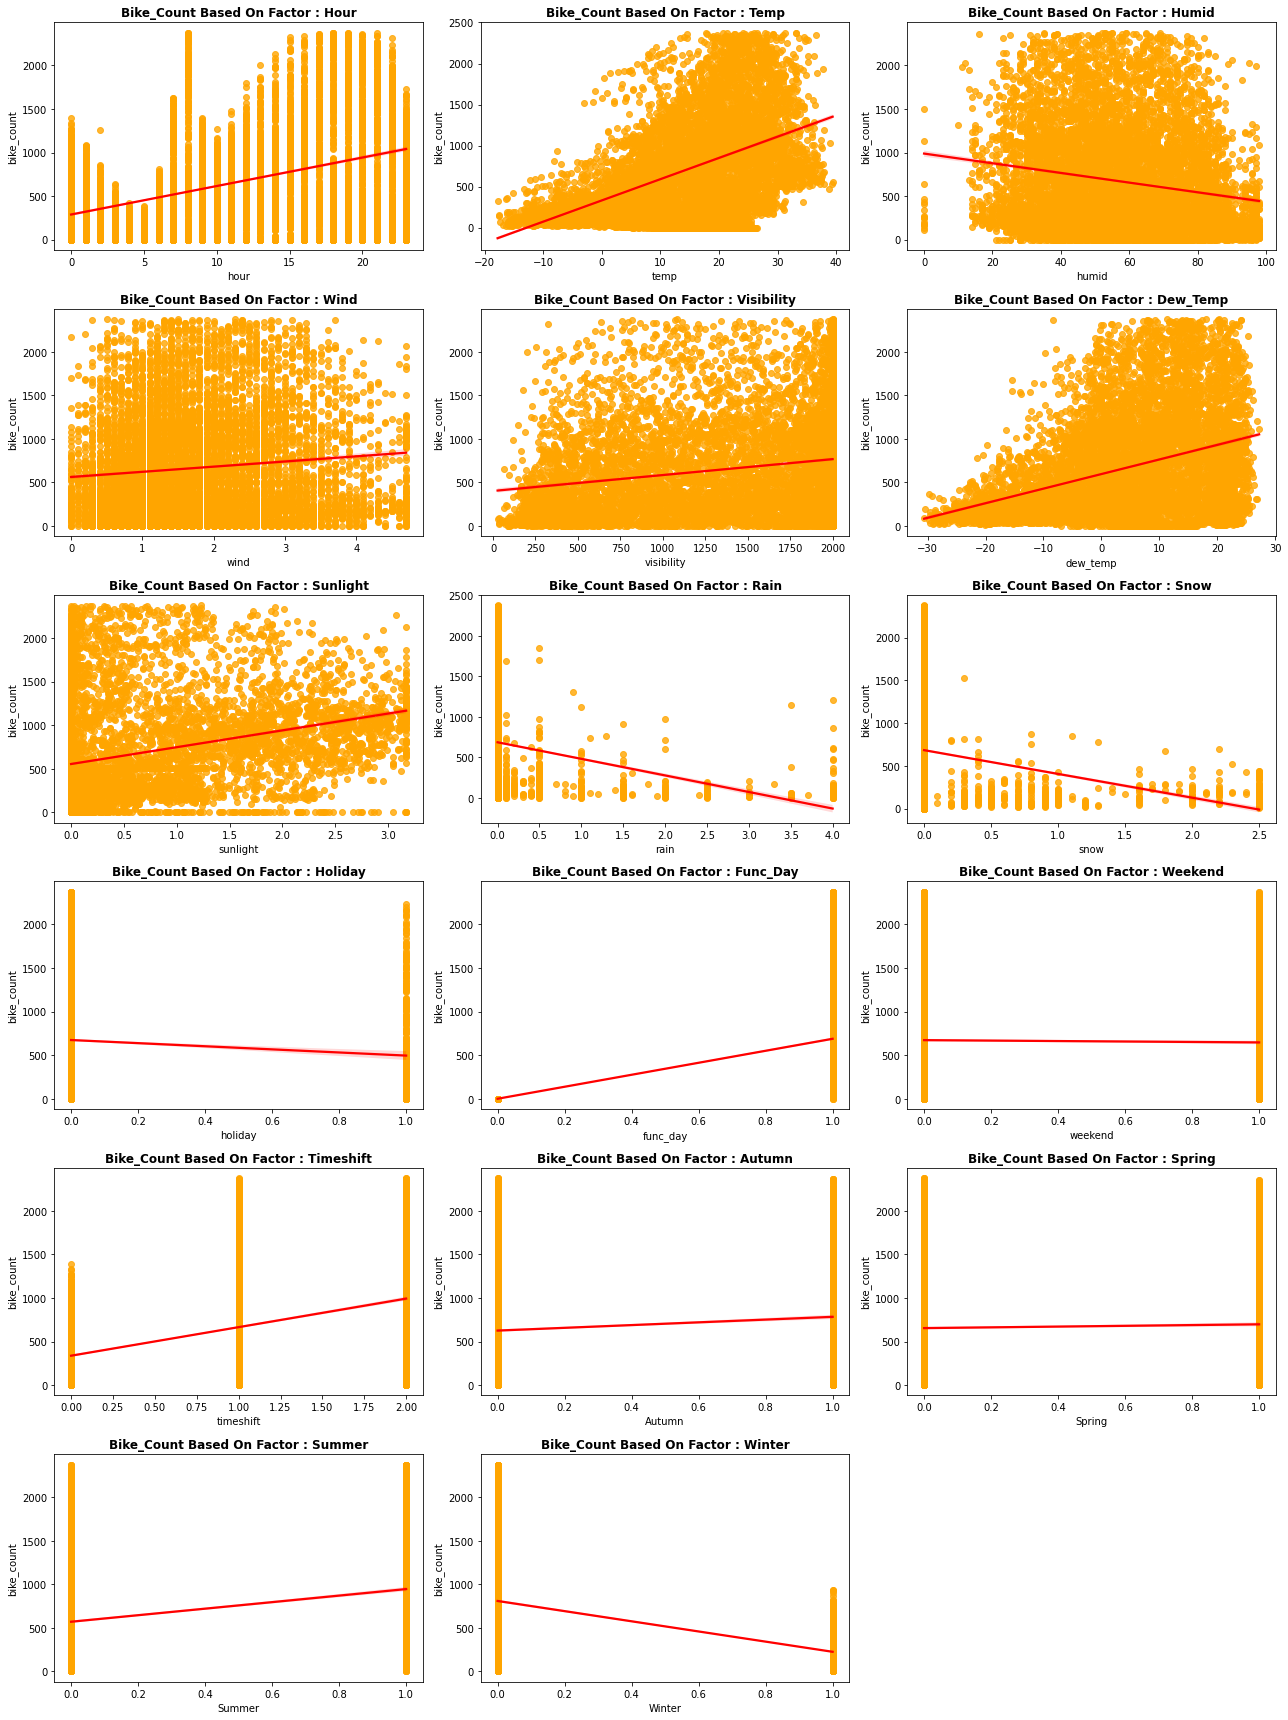

In [24]:
# Creating Independent Variables

indep_var=[i for i in df.columns if i not in ['bike_count']]

# Checking Linearity

plt.figure(figsize=(18, 24))
for n,column in enumerate(indep_var):
  plt.subplot(6, 3, n+1)
  sns.regplot(data = df, x = column, y ='bike_count', line_kws={"color": "red"}, color='orange')
  plt.title(f'Bike_Count Based On Factor : {column.title()}',weight='bold')
  plt.tight_layout()

In [25]:
# Checking Skewness Of The Dependent Variable

print(f'Skewness of original data : {df.bike_count.skew()}')
print(f'Skewness after log transformation : {np.log(df.bike_count).skew()}')
print(f'Skewness after SQRT transformation : {np.sqrt(df.bike_count).skew()}')

Skewness of original data : 0.983470199089409
Skewness after log transformation : nan
Skewness after SQRT transformation : 0.153123685071092


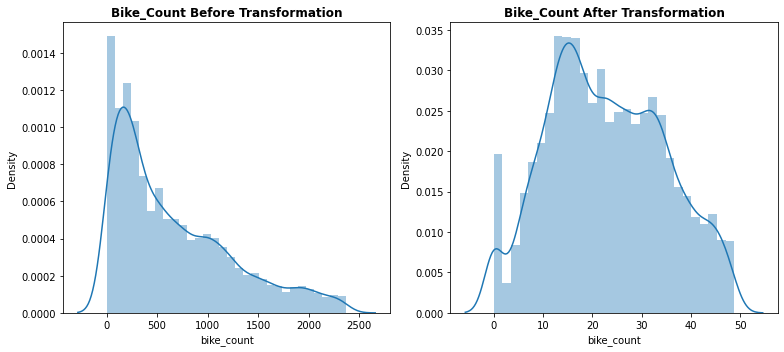

In [26]:
# The Skewness After Sqrt Transformation Lies Between -0.5 and 0.5 Indicates That The Distribution Is Fairly Symmetrical

plt.figure(figsize=(11,5))
plot = plt.subplot(1,2,1)
sns.distplot(df['bike_count']).set_title('Bike_Count Before Transformation',weight='bold')
plot = plt.subplot(1,2,2)
sns.distplot(np.sqrt(df['bike_count'])).set_title('Bike_Count After Transformation',weight='bold')
plt.tight_layout()

In [27]:
# Bike _count Column Summay After SQRT Transformation

np.sqrt(df['bike_count']).describe()

count    8760.000000
mean       22.912920
std        11.833733
min         0.000000
25%        13.820275
50%        22.455511
75%        31.937439
max        48.733972
Name: bike_count, dtype: float64

## **4. Feature Selection By Removing MultiColinearity Using VIF**

In [28]:
# Creating Function For VIF Calculation

def calc_vif(X):

    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif.sort_values(by='VIF',ascending=False).reset_index(drop=True))

Variance inflation factor (VIF) is a measure of the amount of multicollinearity in a set of multiple regression variables.In other words, it measures the severity of multicollinearity in regression analysis. It is a statistical concept that indicates the increase in the variance of a regression coefficient as a result of collinearity.

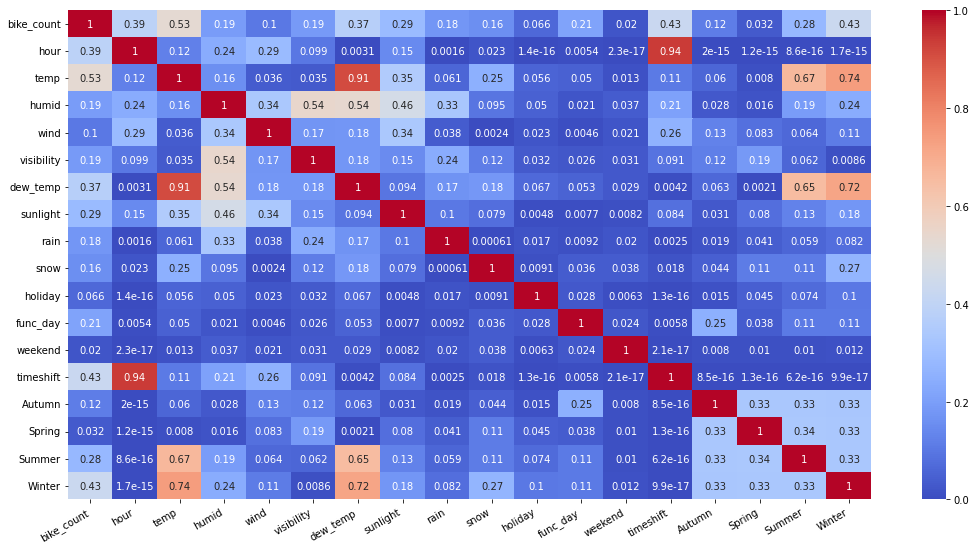

In [29]:
# Checking For Correlation

plt.figure(figsize=(18,9))
plot=sns.heatmap(abs(df.corr()), annot=True, cmap='coolwarm')
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

In [30]:
# Calculating VIF For Independent Variables

calc_vif(df[indep_var])

,variables,VIF
0,dew_temp,119.298136
1,Summer,116.141121
2,Spring,112.673201
3,Autumn,110.725563
4,Winter,107.844468
5,temp,90.833188
6,humid,21.238433
7,hour,8.781649
8,timeshift,8.555039
9,sunlight,2.078721


As we can see the observations we got from above heatmap and VIF values form VIF table, features with high correlation among them are much of a concern. So, the features Winter, Summer, dew_temp, hour has to be removed.

In [31]:
indep_var2 = [i for i in df.columns if i not in ['bike_count','Winter','Summer','dew_temp','hour']]
calc_vif(df[indep_var2])

,variables,VIF
0,func_day,19.431709
1,humid,12.626946
2,visibility,7.289075
3,wind,4.835694
4,temp,3.459415
5,timeshift,3.005884
6,sunlight,2.523727
7,Autumn,1.585520
8,Spring,1.562492
9,weekend,1.403065


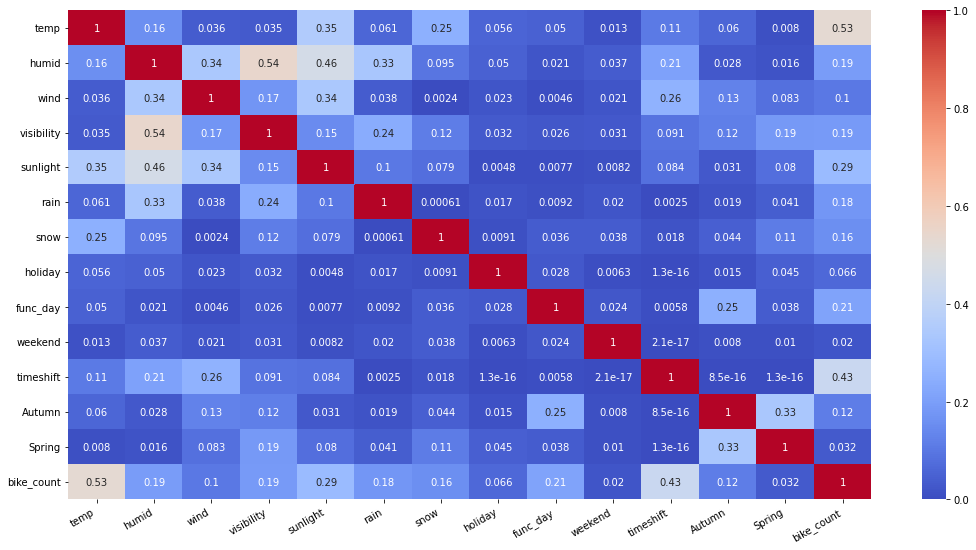

In [32]:
# Updating the dataset

df2 = df[indep_var2 + ['bike_count']]

# Checking For Correlation

plt.figure(figsize=(18,9))
plot=sns.heatmap(abs(df2.corr()), annot=True, cmap='coolwarm')
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

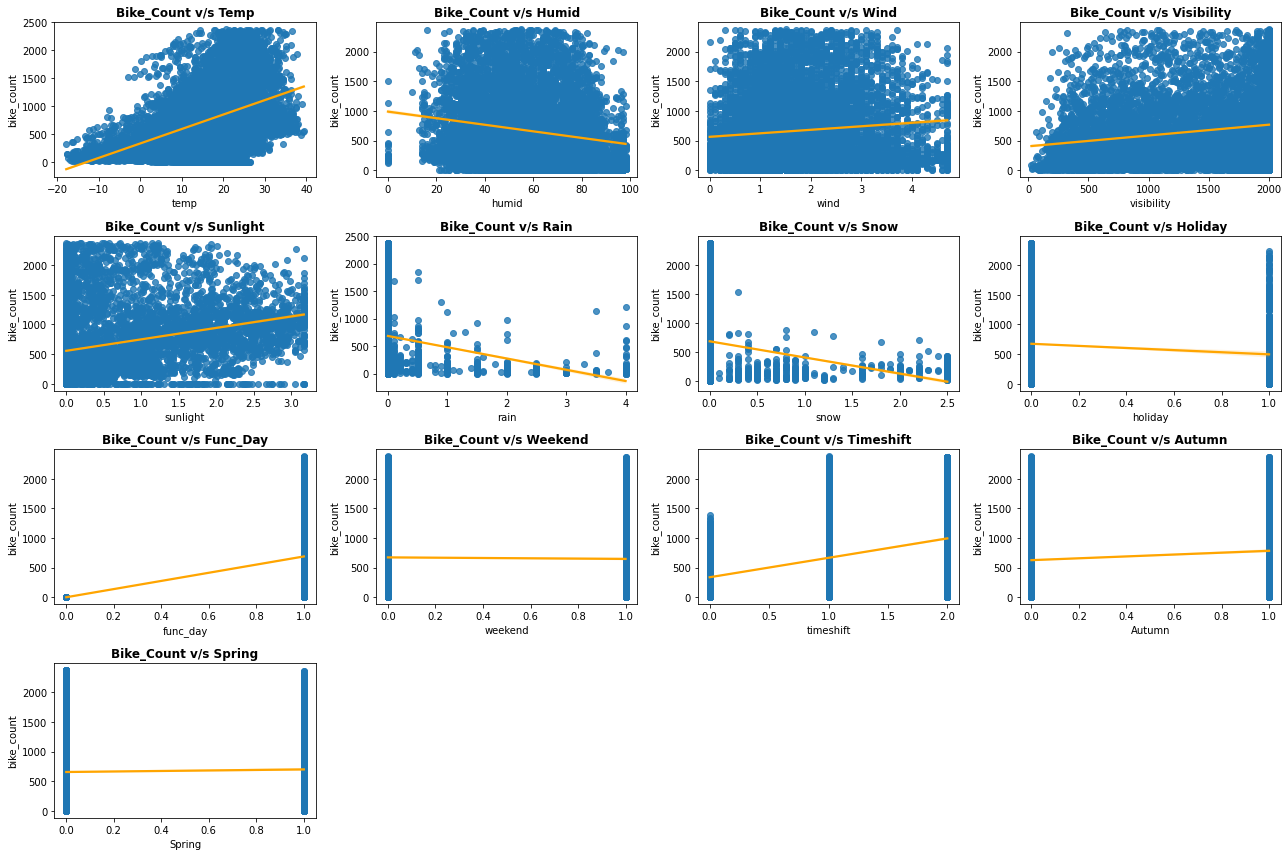

In [33]:
# Checking Linearity Of New Dataset

plt.figure(figsize=(18,12))
for n,column in enumerate(indep_var2):
  plt.subplot(4, 4, n+1)
  sns.regplot(data = df2, x = column, y ='bike_count',line_kws={"color": "orange"})
  plt.title(f'Bike_Count v/s {column.title()}',weight='bold')
  plt.tight_layout()

In [34]:
df2

,temp,humid,wind,visibility,sunlight,rain,snow,holiday,func_day,weekend,timeshift,Autumn,Spring,bike_count
0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,1,0,0,0,0,254.0
1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,1,0,0,0,0,204.0
2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,0,0,0,0,173.0
3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,1,0,0,0,0,107.0
4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,1,0,0,0,0,78.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,4.2,34,2.6,1894,0.0,0.0,0.0,0,1,0,2,1,0,1003.0
8756,3.4,37,2.3,2000,0.0,0.0,0.0,0,1,0,2,1,0,764.0
8757,2.6,39,0.3,1968,0.0,0.0,0.0,0,1,0,2,1,0,694.0
8758,2.1,41,1.0,1859,0.0,0.0,0.0,0,1,0,2,1,0,712.0


## **5. Model Building**

In [35]:
# Defining Required Variables

scaler = MinMaxScaler()
y = np.sqrt(df['bike_count'])
features = [i for i in df.columns if i not in ['bike_count']]

In [36]:
# Defining A Function To Train The Input Model And Print Evaluation Metrics

def analyse_model(model, X_train, X_test, y_train, y_test):

  '''Takes regressor model and train test splits as input and prints the
  evaluation metrics with the plot and returns the model'''

  # Fitting The Model
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  p,q = y_test**2,y_pred**2

  # Calculating Evaluation Metrics
  mse = mean_squared_error(p,q)
  rmse = np.sqrt(mse)
  r2 = r2_score(p,q)
  try:
    importance = model.feature_importances_
    feature = features
  except:
    importance = np.abs(model.coef_)
    feature = indep_var2
  indices = np.argsort(importance)
  indices = indices[::-1]

  # Printing Evaluation Metrics
  print("MSE :" , mse)
  print("RMSE :" ,rmse)
  print("MAE :" ,mean_absolute_error(p,q))
  print("Train R2 :", r2_score(y_train**2,model.predict(X_train)**2))
  print("Test R2 :" ,r2)
  print("Adjusted R2 : ", 1-(1-r2)*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1)))

  # Plotting Actual And Predicted Values And The Feature Importance
  plt.figure(figsize=(18,6))
  plt.subplot(2,1,1)
  plt.plot((y_pred)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.title('Actual and Predicted Bike Counts')
  plt.subplot(2,1,2)
  plt.bar(range(len(indices)),importance[indices])
  plt.xticks(range(len(indices)), [feature[i] for i in indices])
  plt.title('Feature Importance')
  plt.tight_layout()
  plt.show()

  return model

In [37]:
# Providing The Range Of Values For Hyperparameters Such As Number Of Trees:
n_estimators = [200]

# Maximum Depth Of Trees:
max_depth = [8,12]

# Minimum Number Of Samples Required To Split A Node:
min_samples_split = [5,40]

# Minimum Number Of Samples Required At Each Leaf Node:
min_samples_leaf = [10]

# Learning Rate:
eta = [0.009,0.05,0.08,0.1]

**Linear Regressor Algorithm**

MSE : 134002.27972883597
RMSE : 366.06321821351565
MAE : 250.34761309863438
Train R2 : 0.5937220377468445
Test R2 : 0.6020258690210505
Adjusted R2 :  0.5990490774774795


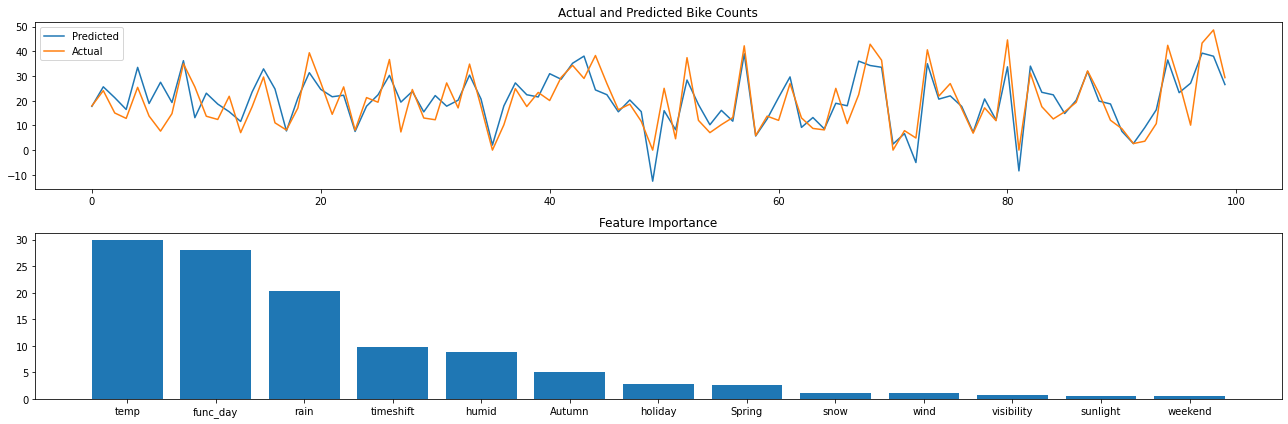

LinearRegression()

In [38]:
# Splitting The Data Into Train And Test

X = scaler.fit_transform(df[indep_var2])
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.20, random_state = 0)

# Fitting Linear Regression Model

lr = LinearRegression()
analyse_model(lr, X_train, X_test, y_train, y_test)

**Decision Tree Regressor Algorithm**

MSE : 79758.3396134411
RMSE : 282.41519012517915
MAE : 170.55686313495087
Train R2 : 0.8084618188251564
Test R2 : 0.7634656823633366
Adjusted R2 :  0.7616143548311896


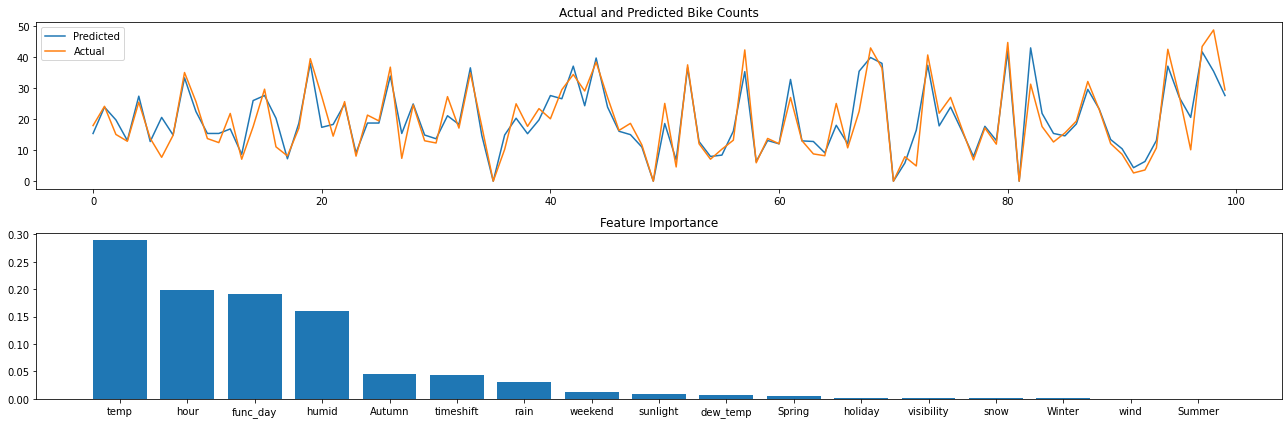

DecisionTreeRegressor(max_depth=12, min_samples_leaf=10, min_samples_split=40,
                      random_state=1)

In [39]:
# Splitting The Data Into Train And Test By Redefining X

X = scaler.fit_transform(df[features])
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.25, random_state = 0)

# Regressor
regressor = DecisionTreeRegressor(random_state=1)

# HyperParameter Grid
grid = {'max_depth' : max_depth,
        'min_samples_split' : min_samples_split,
        'min_samples_leaf' : min_samples_leaf}

# GridSearch To Find The Best Parameters
dt = GridSearchCV(regressor, param_grid = grid, scoring = 'neg_mean_squared_error', cv=3)
dt.fit(X_train, y_train)

# Analysing The Model WithBbest Set Of Parameters
analyse_model(dt.best_estimator_, X_train, X_test, y_train, y_test)

**Random Forest Regressor Algorithm**

MSE : 69422.92969516138
RMSE : 263.4823138185206
MAE : 158.43685474999813
Train R2 : 0.8371464692068896
Test R2 : 0.794116760913416
Adjusted R2 :  0.7925053359297733


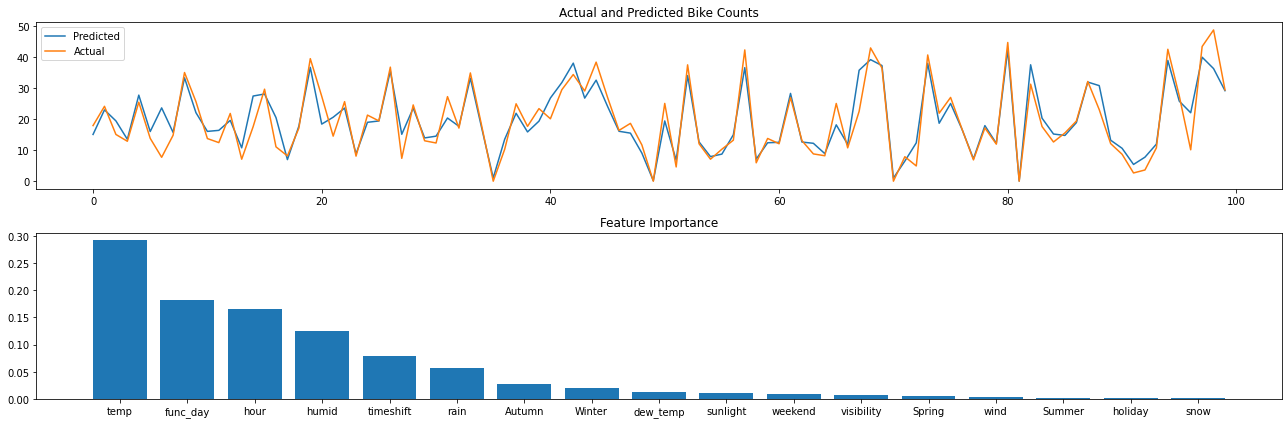

RandomForestRegressor(max_depth=12, min_samples_leaf=10, min_samples_split=5,
                      n_estimators=200, random_state=2)

In [40]:
# Regressor
regressor = RandomForestRegressor(random_state=2)

# HyperParameter Grid
grid = {'n_estimators' : n_estimators,
        'max_depth' : max_depth,
        'min_samples_split' : min_samples_split,
        'min_samples_leaf' : min_samples_leaf}

# GridSearch To Find The Best Parameters
rf = GridSearchCV(regressor, param_grid = grid, scoring = 'neg_mean_squared_error', cv=3)
rf.fit(X_train, y_train)

# Analysing The Model With Best Set Of Parameters
analyse_model(rf.best_estimator_, X_train, X_test, y_train, y_test)

**XGBoost Regressor Algorithm**

MSE : 58205.66827645859
RMSE : 241.25850923119498
MAE : 133.87311704760478
Train R2 : 0.9801644218229884
Test R2 : 0.8273830912844384
Adjusted R2 :  0.8260320381315082


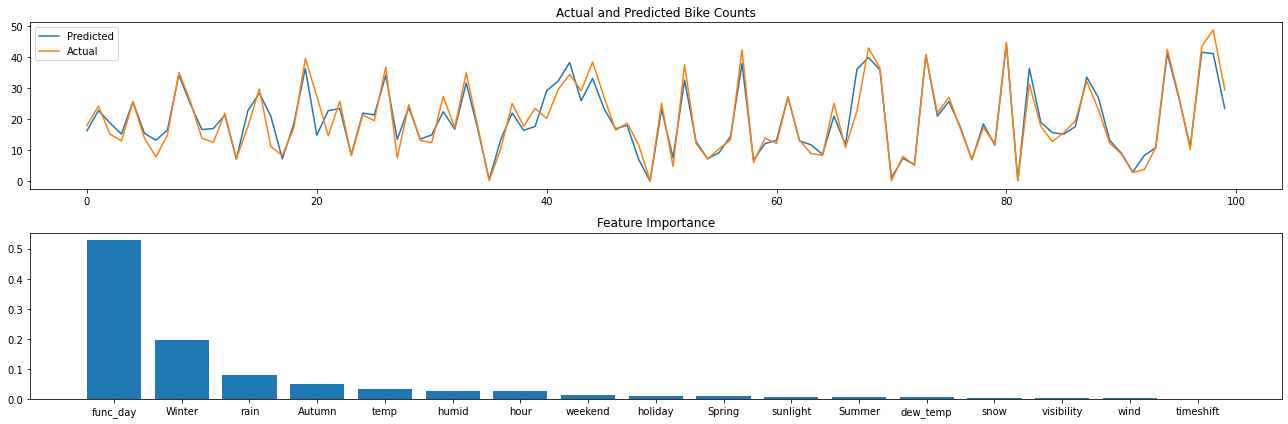

XGBRegressor(eta=0.009, max_depth=8, min_samples_leaf=10, min_samples_split=5,
             n_estimators=200, random_state=3, silent=True)

In [42]:
# Regressor
regressor = XGBRegressor(silent=True, random_state=3)

# Hyperparameter Grid
grid = {'n_estimators' : n_estimators,
        'max_depth' : max_depth,
        'min_samples_split' : min_samples_split,
        'min_samples_leaf' : min_samples_leaf,
        'eta' : eta}

# GridSearch To Find The Best Parameters
xgb = GridSearchCV(regressor, param_grid = grid, scoring = 'neg_mean_squared_error', cv=3)
xgb.fit(X_train, y_train)

# Analysing The Model With Best Set Of Parameters
analyse_model(xgb.best_estimator_, X_train, X_test, y_train, y_test)

**Gradient Boosting Regressor Algorithm**

MSE : 59412.66631766639
RMSE : 243.74713601941335
MAE : 134.51864752805906
Train R2 : 0.9616302600505027
Test R2 : 0.8238035727105868
Adjusted R2 :  0.822424503067898


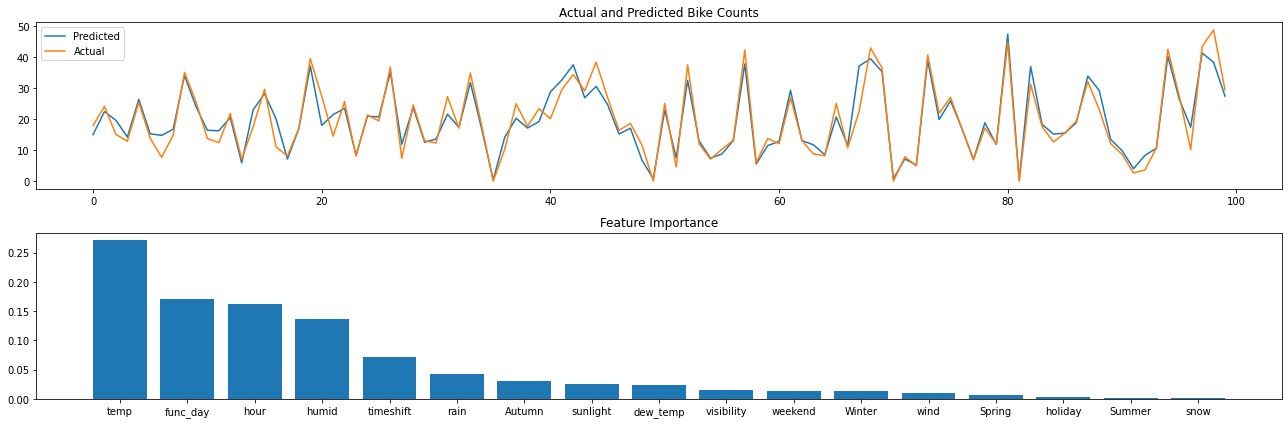

GradientBoostingRegressor(max_depth=8, min_samples_leaf=10, min_samples_split=5,
                          n_estimators=200, random_state=4)

In [43]:
# Regressor
regressor = GradientBoostingRegressor(random_state=4)

# Hyperparameter Grid
grid = {'n_estimators' : n_estimators,
        'max_depth' : max_depth,
        'min_samples_split' : min_samples_split,
        'min_samples_leaf' : min_samples_leaf}

# GridSearch To Find The Best Parameters
gbr = GridSearchCV(regressor, param_grid = grid, scoring = 'neg_mean_squared_error', cv=3)
gbr.fit(X_train, y_train)

# Analysing The Model With Best Set Of Parameters
analyse_model(gbr.best_estimator_, X_train, X_test, y_train, y_test)

## **6. Conclusion**

1.   Temperature is the most important feature for Linear Regressor, DecisionTree, RandomForest and GradientBoosting Regressor.
2.   Functioning day is the first most feature and Winter is the second most important for XGBoostRegressor.
3.   RMSE Comparisons:
     A.LinearRegressor RMSE : 366.06 
     B.DecissionTreeRegressor RMSE : 282.41
     C.RandomForestRegressor RMSE : 263.48
     D.XGBoostRegressor RMSE : 241.16
     E.GradientBoostingRegressor RMSE : 243.62
5.   The feature temperature is on the top list for all the regressors except XGBoost.
6.   XGBoost is acting different from all the regressors as it is considering whether it is winter or not. And is it a working day or not. Though winter is also a function of temperature only but it seems this trick of XGBoost is giving better results. 
7.   XGBoostRegressor has the Least Root Mean Squared Error. So It can be considered as the best model for given problem.